In [29]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize pixel values to the range [0, 1]
train_images = np.array([cv2.resize(img, (128, 128)) for img in train_images])
test_images = np.array([cv2.resize(img, (128, 128)) for img in test_images])

train_images = train_images.reshape((60000, 128, 128, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 128, 128, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()
# Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
# Max pooling layer to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output for dense layers
model.add(layers.Flatten())
# Dense layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))
# Output layer with 10 units (for 10 digits) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Use 10% of the training data for validation
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('handwritten_digit_model.h5')

Epoch 1/5
844/844 [==============================] - 549s 647ms/step - loss: 0.1427 - accuracy: 0.9564 - val_loss: 0.0576 - val_accuracy: 0.9845
Epoch 2/5
844/844 [==============================] - 523s 620ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 3/5
844/844 [==============================] - 527s 624ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 4/5
844/844 [==============================] - 521s 617ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 28s 89ms/step - loss: 0.0676 - accuracy: 0.9833
Test accuracy: 0.983299970626831


C:\Users\soumi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
#!pip install opencv-python

The recognized digit is 3.


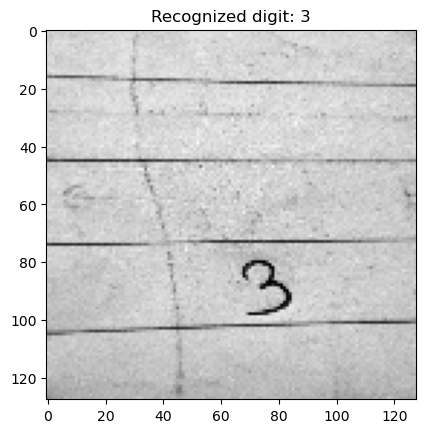

In [13]:
# Import necessary libraries
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('C:/Users/soumi/Downloads/handwritten_digit_model.h5')

# Create a Tkinter root window
root = tk.Tk()
root.withdraw()

# Open a file dialog window to select an image file
file_path = filedialog.askopenfilename()

# Open the image file and convert it to grayscale
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Check the dimensions of the image
if image.shape[0] == 0 or image.shape[1] == 0:
    print("Error: Invalid image dimensions.")
else:
    # Resize the image to 128x128 pixels and normalize the pixel values
    resized_image = cv2.resize(image, (128, 128)).astype('float32') / 255

    # Reshape the image to match the input shape of the model
    reshaped_image = resized_image.reshape((1, 128, 128, 1))

    # Predict the probabilities for each class
    probabilities = model(reshaped_image)[0]

    # Get the index of the class with the highest probability
    digit = np.argmax(probabilities)

    # Print the recognized digit
    print(f"The recognized digit is {digit}.")

    # Display the image and the recognized digit
    plt.imshow(resized_image, cmap='gray')
    plt.title(f'Recognized digit: {digit}')
    plt.show()

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('C:/Users/soumi/Downloads/handwritten_digit_model.h5')

# Open the default camera
cap = cv2.VideoCapture(0)

# Variable to control the prediction
predict = False

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Check the dimensions of the image
    if image.shape[0] == 0 or image.shape[1] == 0:
        print("Error: Invalid image dimensions.")
    else:
        if predict:
            # Resize the image to 128x128 pixels and normalize the pixel values
            image = cv2.resize(image, (128, 128)).astype('float32') / 255

            # Reshape the image to match the input shape of the model
            image = image.reshape((1, 128, 128, 1))

            # Predict the probabilities for each class
            probabilities = model.predict(image)[0]

            # Get the index of the class with the highest probability
            digit = np.argmax(probabilities)

            # Print the recognized digit
            print(f"The recognized digit is {digit}.")

            # Display the recognized digit on the frame
            cv2.putText(frame, str(digit), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    # Check for key presses
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('p'):
        # Toggle prediction on/off
        predict = not predict

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 104ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 23ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 26ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 21ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 18ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 28ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 41ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 37ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 39ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 44ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 42ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 22ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 23ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 39ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 18ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 21ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 38ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 21ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 42ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 37ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 19ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 20ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 25ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 19ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 22ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 36ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 51ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 38ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 39ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 24ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 19ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 40ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 19ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 43ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 21ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 22ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 17ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 28ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 1.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 60ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 5.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 9.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 45ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 25ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 21ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 20ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 21ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 16ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 41ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 20ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 18ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 27ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 47ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 17ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 18ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 17ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 23ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 45ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 35ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 40ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 49ms/step
The recognized digit is 2.
1/1 [==============================] - 0s 46ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 51ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 34ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 33ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 23ms/step
The recognized digit is 3.
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 0.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 28ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 30ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 29ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 32ms/step
The recognized digit is 7.
1/1 [==============================] - 0s 31ms/step
